# ML in Cybersecurity: Project I

## Team
  * **Team name**:  Watchers on the Wall
  * **Members**:  
1. Chirag Bhuvaneshwara(s8chbhuv@stud-uni.saarland.de), 2571703
2. Vedika Agarwal (s8veagar@stud-uni.saarland.de), 2571203
3. Khushboo Mehra (s8khmehr@stud.uni-saarland.de), 2576512

  * **Tutor**: Tribhuvanesh Orekondy


## Logistics
  * **Due date**: 11th November 2018, 23:59:59 (to email the completed notebook to your respective tutors)
  * Complete this in **teams of 3**
  * Write to Hossein (hossein.hajipour@cispa.saarland) by **2nd November** your team members and team-name. 
  * In case you cannot find a team, some available options: (a) Contact Hossein, who can help you out (b) Post on the [course group](https://groups.google.com/d/forum/ml-cysec-2018)
  * Each team will be assigned a tutor. Mail the notebook (or share the collab link) to the respective TAs before the due date.
  
  
## Timeline
  * 29-Oct-2018: Project 1 hand-out
  * 2-Nov-2018: Write to Hossein your team-name and members
  * 5-Nov-2018: Each team is assigned a tutor
  * **11-Nov-2018** (23:59:59): Email completed notebook to respective TAs
  * **12-Nov-2018** (12:15-14:00, regular tutorial slot): Teams present their projects
  * 19-Nov-2018 (12:15-14:00, regular tutorial slot): Project 1 discussion and summary
  
  
## About this Project
In this project, you'll implement a digit classifier, based on the popular [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The dataset is based on a seminal [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf), which immensely popularized (convolutional) neural networks. This is a great starting point for ML research and this dataset/model has been a stepping stone numerous other tasks such as [GANs](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf), [Adversarial Perturbations](https://arxiv.org/abs/1412.6572) and so many more!

This dataset consists of data $\mathcal{D} = \{x_i, y_i\}_{i=1}^N$, where $x_i$ is a 28x28 pixel grayscale image and $y_i$ is a scalar represeting digits between 0-9. The notebook will guide you to load this data, implement classifiers $\hat{y_i} = f_w(x_i)$  and analyze results. By doing so, you'll have a ML model that works on real data!

To put things into context, have a look at Slide 24 in the [second](https://cms.cispa.saarland/mlcysec/dl/2/2018-10-24_ML_overview.pdf) lecture. Within this framework, the following blocks of this project are fixed:
  * *Real-world problem*: Digit classification
  * *Performance metric*: Mean accuracy i.e., $ \frac{1}{N} \sum_{i=1}^N \mathbb{1}[\hat{y_i} = y_i]$, where $\mathbb{1}[\hat{y_i} = y_i]$ is 1 if your model predicted the right digit for the $i$-th digit and 0 otherwise.
  * *Data*: The MNIST dataset

You'll make the the following design-choices:
 * *Choice of Model*: A model family (Non-parametric methods, Linear classifiers, Neural Networks, etc.)
 * *ML Model*: Specific model (e.g., SVM with a polynomial kernel)
 * *Loss/Risk*
 * *Optimization*


## A Note on Grading
The grading for this project will depend on:
 1. Functional digit classifier
   * Following a well-defined ML pipeline
   * Developing 3 classification models (keep them diverse and ideally of increasing complexity)
   * Obtaining reasonable accuracies (>80%) on a held-out test set
 1. Analysis
   * Which methods work better than the rest and why?
   * Which hyper-parameters and design-choices were important in each of your methods?
   * Quantifying influence of these hyper-parameters on loss and/or validation accuracies
   * Trade-offs between methods, hyper-parameters, design-choices
    * Anything else you find interesting (this part is open-ended)
 
We will evaluate this criteria in a **12-minute presentation** (9 mins for presentation + 3 mins for Q&A). This will be during the regular tutorial slot on 12th November 12:00-14:00 (Location will be conveyed soon). In case you have time restrictions during the time of the tutorial, notify us asap!  You can present on your laptops.

The most interesting findings will be discussed in the tutorial slot on 19th November.
 
 A note on (1.): 
  * choose your models that aids good insights. We require at least one non-Neural Network (e.g., SVM, KNN) and one Neural Network model (e.g., MLP, CNN).
  * We definitely don't expect all three models to achieve >99% test accuracies!
 
 
 ## Filling-in the Notebook
You'll be submitting this very notebook that is filled-in with your code and analysis. Make sure you submit one that has been previously executed in-order. (So that results/graphs are already visible upon opening it). 

The notebook you submit **should compile** (or should be self-contained and sufficiently commented). Check tutorial 1 on how to set up the Python3 environment.
(**Update**: Use Python 3.6, since Keras with Tensorflow backend doesn't yet support 3.7)

It is extremely important that you **do not** re-order the existing sections. Apart from that, the code blocks that you need to fill-in are given by:
```
#
#
# ------- Your Code -------
#
#
```
Feel free to break this into multiple-cells. It's even better if you interleave explanations and code-blocks so that the entire notebook forms a readable "story".


## Code of Honor
We encourage discussing ideas and concepts with other students to help you learn and better understand the course content. However, the work you submit and present **must be original** and demonstrate your effort in solving the presented problems. **We will not tolerate** blatantly using existing solutions (such as from the internet), improper collaboration (e.g., sharing code or experimental data between groups) and plagiarism. If the honor code is not met, no points will be awarded.

 
 ## Versions
  * v1.15: Added a note on using Python 3.6 (instead of 3.7 previously suggested)
  * v1.1: Added Code of Honor
  * v1.0: Initial notebook
  
  ---

In [37]:
import time 
 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl

import json 
import time 
import pickle 
import sys 
import csv 
import os 
import os.path as osp 
import shutil 

import pandas as pd

from IPython.display import display, HTML
 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
# for auto-reloading external modules 
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
plt.rcParams['axes.prop_cycle']=mpl.cycler(color=['blue', 'green', 'red', 'cyan', 'yellow', 'purple', 'brown', 'orange', 'teal', 'lightblue', 'darkgreen', 'darkred', 'darkblue'])

In [3]:
# Load other libraries here.
# Keep it minimal! We should be easily able to reproduce your code.
!pip install -q keras
import keras

# In case you want to use neural networks, we only support sklearn and keras (With a tensorflow backend).

Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Helpers

In case you choose to have some methods you plan to reuse during the notebook, define them here. This will avoid clutter and keep rest of the notebook succinct.

In [0]:
path='/content/gdrive/My Drive/'

def write_logs(data,f):
  fname=path+f
  with open(fname,'w') as fh:
    json.dump(data,fh)

def read_logs(f):
  fname=path+f
  with open(fname,'r') as fh:
    data=json.load(fh)
    
  return data

In [0]:
def plot_res(data,name): 
    fname=path+name
    fig = plt.figure(figsize=(16, 12))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax4 = fig.add_subplot(2, 2, 4)
    for model,stats in data.items():
        ax1.plot(stats['loss'], label=model)
        ax2.plot(stats['acc'], label=model)
        ax3.plot(stats['val_loss'], label=model)
        ax4.plot(stats['val_acc'], label=model)
    ax1.legend(loc=0)
    ax1.set_xlabel('Epoch number')
    ax1.set_ylabel('Training set error')
    ax1.set_yscale('log')
    ax2.legend(loc=4)
    ax2.set_xlabel('Epoch number')
    ax2.set_ylabel('Training set accuracy')
    ax2.set_yscale('log')
    ax3.legend(loc=0)   
    ax3.set_xlabel('Epoch number')
    ax3.set_ylabel('Validation set error')
    ax3.set_yscale('log')
    ax4.legend(loc=4)
    ax4.set_xlabel('Epoch number')
    ax4.set_ylabel('Validation set accuracy')
    ax4.set_yscale('log')
    fig.savefig(fname)
    plt.show()
    
    
def plot_res_compact(data,name): 
    fname=path+name
    fig = plt.figure(figsize=(16, 12))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    for model,stats in data.items():
        ax1.plot(stats['loss'], '--',label='train')
        ax2.plot(stats['acc'], '--', label='train')
        ax1.plot(stats['val_loss'], label='val')
        ax2.plot(stats['val_acc'], label='val')
    ax1.legend(loc=0)
    ax1.set_xlabel('Epoch number')
    ax1.set_ylabel('Loss')
    ax1.set_yscale('log')
    ax2.legend(loc=4)
    ax2.set_xlabel('Epoch number')
    ax2.set_ylabel('Accuracy')
    ax2.set_yscale('log')
    fig.savefig(fname)
    plt.show()

# 1. Loading and Visualizing data

In this section, you'll need to prepare the MNIST data for the experiments you'll be conducting for the remainder of the notebook.

## 1.1. Load Data

Here you'll load the MNIST data into memory. The end-goal is to two have the following variables:
  * `x_trainval`, `x_test`: of shape $N \times d_1 \times d_2 \dots$ (e.g., $N \times 784$. 784 since you could flatten each 28x28 pixel image into a single vector)
  * `y_trainval`, `y_test`: of shape $N \times K$ (K = 1 or 10 depending on how you plan to represent the ground-truth digit annotation)

You can either do this by:
  1. Downloading the MNIST dataset, unpacking and preparing it yourself to have fine-grained control
  1. Using high-level existing functions, such as the one provided by  [`keras.datasets`](https://keras.io/datasets/#mnist-database-of-handwritten-digits).
  
  
  In either case, it is important that you have disjoint trainval and test splits!

In [56]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from random import randint

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.datasets import make_classification

# Set random seed
np.random.seed(0)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train.shape = {},  y_train.shape = {}'.format(x_train.shape, y_train.shape))
print('x_test.shape = {},  y_test.shape = {}'.format(x_test.shape, y_test.shape))

x_train_plt = x_train
y_train_labels=y_train

im_size = 784 # 28 x 28
# building the input vector from the 28x28 pixels
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing the data to help with the training
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices with one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train.shape = {},  y_train.shape = {}'.format(x_train.shape, y_train.shape))
print('x_test.shape = {},  y_test.shape = {}'.format(x_test.shape, y_test.shape))

#
# Feel free to have multiple variables in case your models are designed for different formats
# For instance, in case your model requires Nx28x28 inputs, declare x_trainval_3d, etc.

# Tip: Set this to a tiny number (such 0.05) to aid debugging
# After all, you do not want to train/evaluate on the entire dataset to find bugs
DEBUG_FRAC = 0.05
# Resample x_[], y_[]

x_train.shape = (60000, 28, 28),  y_train.shape = (60000,)
x_test.shape = (10000, 28, 28),  y_test.shape = (10000,)
x_train.shape = (60000, 28, 28, 1),  y_train.shape = (60000, 10)
x_test.shape = (10000, 28, 28, 1),  y_test.shape = (10000, 10)


## 1.2. Visualize Data

To get the hang of your data you'll be training a digit classifier on, visualize it.

Examples of ways to visualize it:
  * Given a digit, display few randomly sampled images for this digit (the bare minimum)
  * Visualize as a grid (e.g., Slide 7, [Lecture 2](https://cms.cispa.saarland/mlcysec/dl/2/2018-10-24_ML_overview.pdf)) using a combination of `plt.imshow` and `plt.subplots`
  
It's up to you to decide how you want to do this. The end-goal is for you to potentially give a trailer of the dataset to someone who hasn't seen it before.

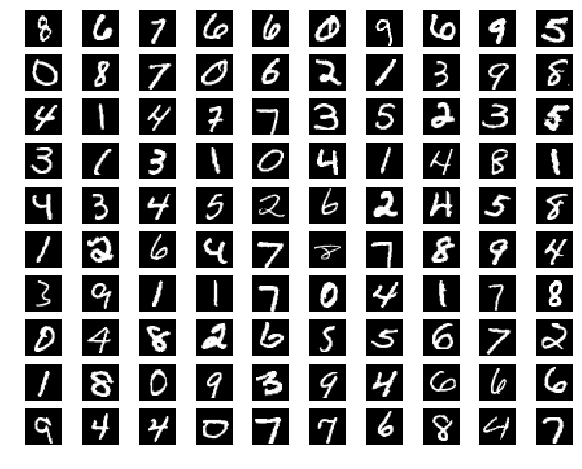

In [14]:
for i in range(100):

    ax = plt.subplot(10, 10, i+1)
    ax.axis('off')

    plt.imshow(x_train_plt[randint(0, x_train.shape[0])])
# plt.savefig('fig1.pdf')   # Save the figures in case you want to use it in the presentation
plt.show()   # These should be some visualization of data at the end of this section

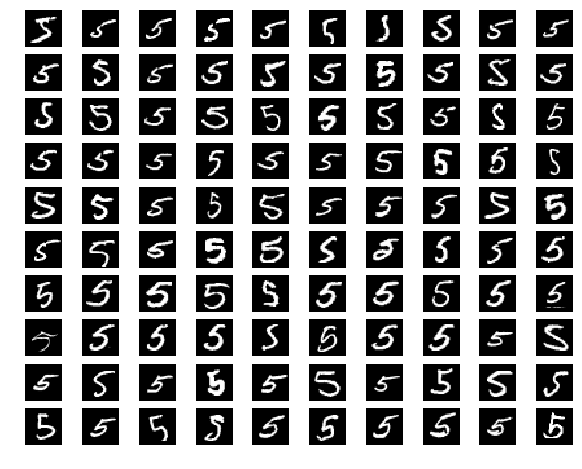

In [23]:
# shows 100 example of a given choice of digit between 0 and 9
def plot_examples(l=1):
  i=0
  ind=0

  for y in y_train_labels:
    if i==100:
      break
    if y==l:
      ax = plt.subplot(10, 10, i+1)
      ax.axis('off')
      plt.imshow(x_train_plt[ind])
      i+=1
    ind+=1
      
  plt.show()
  
plot_examples(5)
        
        
  

# 2. Digit classifiers

In this section, you'll begin developing models to perform digit classification.

Each model needs to be structured like so:
  1. Give a brief reason which model you are going to train and why you choose it
  1. Define hyper-parameters for model and optimization procedure
  1. Define your model
  1. Define optimization method and fit model to data
  1. Summarize your findings







## 2.3: Model [M3]: Convolutional Neural Network

**Short description **: 

A neural network with a simple feed forward architecture does not take the spatial structure of an image into account. Additionally, as the number of layers and the number of hidden units in the layers increase, the number of parameters grows very large. This makes an MLP inefficient and leads to overfitting. Convolutional Neural Networks(CNNs), on the other hand, take advantage of the image structure using three main ideas:
1. local receptive field: The units of the convolution layer are only connected to a small region of the preceding layer.
2. shared weights: This reduces the number of parameters in the network and makes training more efficient.
3. pooling: It takes the input of the preceding conv layer and downsamples along the width and height. This helps the model learn the local spatial structure by simplifying the information in the conv layer output.



### 2.3.1: Hyper-parameters

Define hyper-parameters for your method here

1. learning rate: affects how parameters are updated.
1. number of filters in CONV layer : each filter learns a different feature form the input space, such as, edges of different orientations. This hyperparameter controls the number of feature maps generated by the conv layer.
2. kernel size of CONV layer: controls the local receptive field for each unit i.e. the amount of context considered when identifying patterns. 
3. size of receptive field of POOL layer: controls downsampling.
4. size of dense layer: the output from the last conv+pool layer is flattened and fed to a fully connected layer. Its purpose is to integrate information form the entire image.
5. dropout rate: precentage of activations that get dropped.

Other hyperparameters covered in Model 2 (MLP) such as activation function, optimiser, were not optimised separately for the CNN. We use RelU non-linearity and Adam optimiser becasue they gave the best results for Model2.


In [0]:
batch_size=128
epochs_exp=10
epochs_full=50

# We vary the followig hyperparameters to find the optimal values for each.
# learning rate
lr= [0.5, 0.1, 0.05, 0.01, 0.005,0.001]
# kernel size in conv layer
kernel_size= [3,4,5]
# size of the conv layer
conv= [16,32,64]
# size of the pooling 
pool=[2,3]
# size of the dense layer
fc_size=[128,256,512]
# dropout rates for each dropout layer
drop1=[0,0.25,0.5]
drop2=[0,0.25,0.5]

### 2.3.2: Model

Define your model here (all hyper-parameters in 2.1.1)

We use 2 sets of alternating convolution and pooling layers. The ouputs are flattened and fed to a fully connected layer.

After tuning hyperparamters, we added dropout and batch normalisation (BN) layers for regularisation (to prevent the network from overfitting to the training data).
1. Dropout: This helps the network to learn more robust relationships by preventing inter-dependencies that might emerge between the units. We did not use it after every Conv+Pool layer because dropping too many units causes information loss in the network.
2. BN: changes in the parameters of a layer can change the distribution of inputs in the next layer. This is known as internal covariance shift and requires models to use a lower learnign rate, which slows down training. BN solves this by normalising the input to the next layer towards zero mean and unit variance.

Final model:

Input -> [Conv -> BN -> Pool] -> [Conv -> BN -> Pool] -> Dropout -> FC -> BN -> Dropout -> Output

In [0]:
# model used for training. Some layer such as dropout and batch norm were not a part of the model used for initial hyperparmater search.

def build_model(params,opt='adam'):
  model = Sequential()
  k=(params['kernel_size'],params['kernel_size'])
  p=(params['pool'],params['pool'])
  c=params['conv']
  model.add(Conv2D(c, k, activation='relu',padding='same', input_shape=x_train.shape[1:]))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPooling2D(pool_size=p))
  model.add(Conv2D(c*2, k ,activation='relu', padding='same'))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPooling2D(pool_size=p))
  model.add(Dropout(params['drop1'])) 

  model.add(Flatten())
  model.add(Dense(params['fc_size'], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(params['drop2']))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=params['lr']), metrics=['accuracy'])
  
  return model


Hyperparameter search: 

In [73]:
# using sk-learn to generate hyperparam grid
param_grid = dict(lr=lr,conv=conv,kernel_size=kernel_size,pool=pool,fc_size=fc_size,drop1=drop1,drop2=drop2)
exps=list(ParameterGrid(param_grid))
len(exps)

2916

Grid search would be computationally very expensive, because it would require 2916 fits for hyperparameter tuning.

In [0]:
# started, then abandoned :)

# # logs=[]
# highest=0
# current_acc=0.0
# for i,p in enumerate(exps):
#   print(i)
#   print(p)
#   m=build_model(exps[0])
#   h=train(m,epochs=5)
#   np.save('exp.npy',h)
#   if h.history['val_acc'][-1]>current_acc:
#     highest=i
#     current_acc=h.history['val_acc'][-1]


0
{'conv': 32, 'fc_size': 128, 'kernel_size': 3, 'lr': 0.5, 'pool': 2}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense

Instead, in the next section, we decided to vary one hyperparamter at a time, by keeping the rest frozen. After we get the optimal value for one hyperparamter, that is fixed for future fits to tune the remaining hyperparameters.

Optimal values are chosen based on validation accuracy and the run-time per epoch.

### 2.1.3: Fit Model

Define optimization procedure and fit your model to the data

In [0]:
def train(model, batch_size=128, epochs=5):
#   model.summary()
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.2, verbose=True)

  return history


Hyperparameter search:

In [38]:
params={'conv': conv[0], 'fc_size': fc_size[0], 'kernel_size': kernel_size[0], 'lr': lr[0], 'pool': pool[0]}
# learning rate
lr_logs={}
for l in lr:
  params['lr']=l
  print(params)
  m=build_model(params)
  h=train(m,epochs=10)
  lr_logs[l]=h.history
  
write_logs(lr_logs,'lr_logs.json')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total para

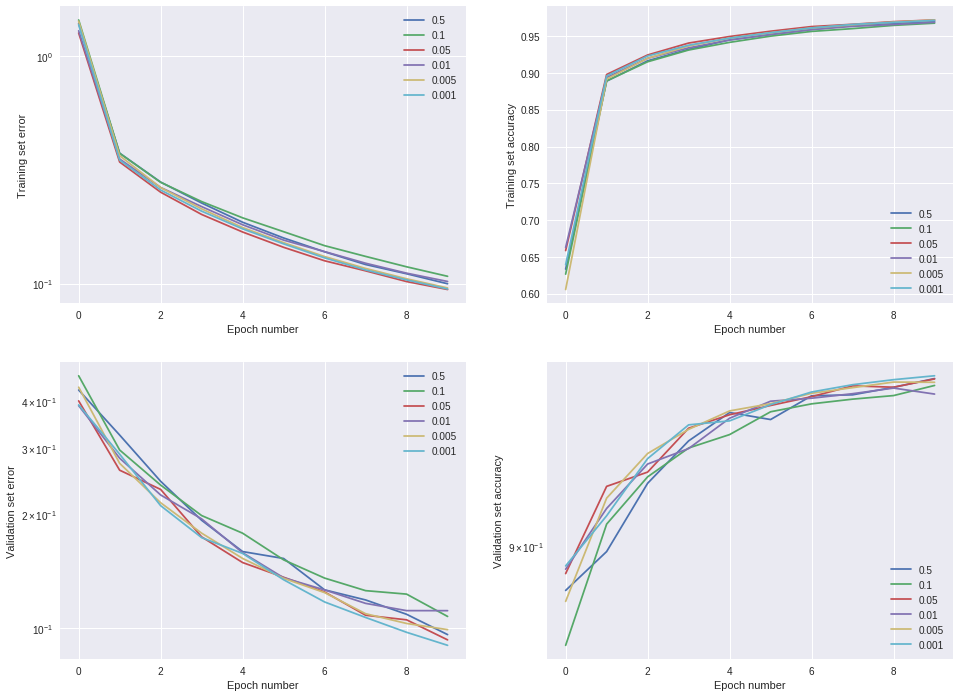

In [93]:
plot_res(lr_logs,'lr.pdf')

Best performance achieved by learning rate= 0.001

val_loss: 0.0991, val_acc: 0.9705

In [98]:
params={'conv': conv[0], 'fc_size': fc_size[0], 'kernel_size': kernel_size[0], 'lr': 0.001, 'pool': pool[0]}
# tuning kernel size
kernel_logs={}
for k in kernel_size[1:]:
  params['kernel_size']=k
  print(params)
  m=build_model(params)
  h=train(m,epochs=10)
  kernel_logs[k]=h.history
  
write_logs(kernel_logs,'kernel_logs.json')

{'conv': 32, 'fc_size': 128, 'kernel_size': 4, 'lr': 0.001, 'pool': 2}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense

Best performance achieved by kernel size= 5

val_loss: 0.0816, val_acc: 0.9745

However, increasing k by 1 increases average run time per epoch by 35sec. Using k=3 is better computationally because the corresponding increase in acuracy is only 0.004

In [18]:
params={'conv': conv[0], 'fc_size': fc_size[0], 'kernel_size': 3, 'lr': 0.001, 'pool': pool[0]}
# tuning conv layer size
conv_logs={}
for c in conv[1:]:
  params['conv']=c
  print(params)
  m=build_model(params)
  h=train(m,epochs=10)
  conv_logs[c]=h.history
  
write_logs(conv_logs,'conv_logs.json')


{'conv': 64, 'fc_size': 128, 'kernel_size': 3, 'lr': 0.001, 'pool': 2}
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 155s 3ms/step - loss: 1.3706 - acc: 0.6617 - val_loss: 0.4103 - val_acc: 0.8824
Epoch 2/10
48000/48000 [==============================] - 154s 3ms/step - loss: 0.3668 - acc: 0.8912 - val_loss: 0.2838 - val_acc: 0.9172
Epoch 3/10
48000/48000 [==============================] - 155s 3ms/step - loss: 0.2780 - acc: 0.9174 - val_loss: 0.2258 - val_acc: 0.9328
Epoch 4/10
48000/48000 [==============================] - 154s 3ms/step - loss: 0.2277 - acc: 0.9313 - val_loss: 0.1893 - val_acc: 0.9461
Epoch 5/10
48000/48000 [==============================] - 154s 3ms/step - loss: 0.1896 - acc: 0.9429 - val_loss: 0.1647 - val_acc: 0.9535
Epoch 6/10
48000/48000 [==============================] - 155s 3ms/step - loss: 0.1630 - acc: 0.9514 - val_loss: 0.1511 - val_acc: 0.9569
Epoch 7/10
48000/48000 [===========================

In [19]:
params={'conv': conv[0], 'fc_size': fc_size[0], 'kernel_size': 3, 'lr': 0.001, 'pool': pool[0]}
# tuning conv layer size (again)
conv_logs2={}
for c in conv:
  params['conv']=c
  print(params)
  m=build_model(params)
  h=train(m,epochs=10)
  conv_logs2[c]=h.history
  
write_logs(conv_logs2,'conv_logs2.json')


48000/48000 [==============================] - 52s 1ms/step - loss: 0.2699 - acc: 0.9198 - val_loss: 0.2252 - val_acc: 0.9350
Epoch 4/10
48000/48000 [==============================] - 53s 1ms/step - loss: 0.2191 - acc: 0.9341 - val_loss: 0.1898 - val_acc: 0.9454
Epoch 5/10
48000/48000 [==============================] - 52s 1ms/step - loss: 0.1859 - acc: 0.9444 - val_loss: 0.1746 - val_acc: 0.9482
Epoch 6/10
48000/48000 [==============================] - 52s 1ms/step - loss: 0.1622 - acc: 0.9506 - val_loss: 0.1467 - val_acc: 0.9575
Epoch 7/10
48000/48000 [==============================] - 52s 1ms/step - loss: 0.1417 - acc: 0.9571 - val_loss: 0.1325 - val_acc: 0.9618
Epoch 8/10
48000/48000 [==============================] - 53s 1ms/step - loss: 0.1281 - acc: 0.9611 - val_loss: 0.1213 - val_acc: 0.9637
Epoch 9/10
48000/48000 [==============================] - 52s 1ms/step - loss: 0.1169 - acc: 0.9650 - val_loss: 0.1221 - val_acc: 0.9658
Epoch 10/10
48000/48000 [===========================

In [0]:
conv_total={'32,32':conv_logs2[32],'16,16':conv_logs2[16],'64,64':conv_logs2[64],
           '32,64':conv_logs['32'],'16,32':conv_logs['16'],'64,128':conv_logs['64']}
write_logs(conv_total,'conv_logs_total.json')

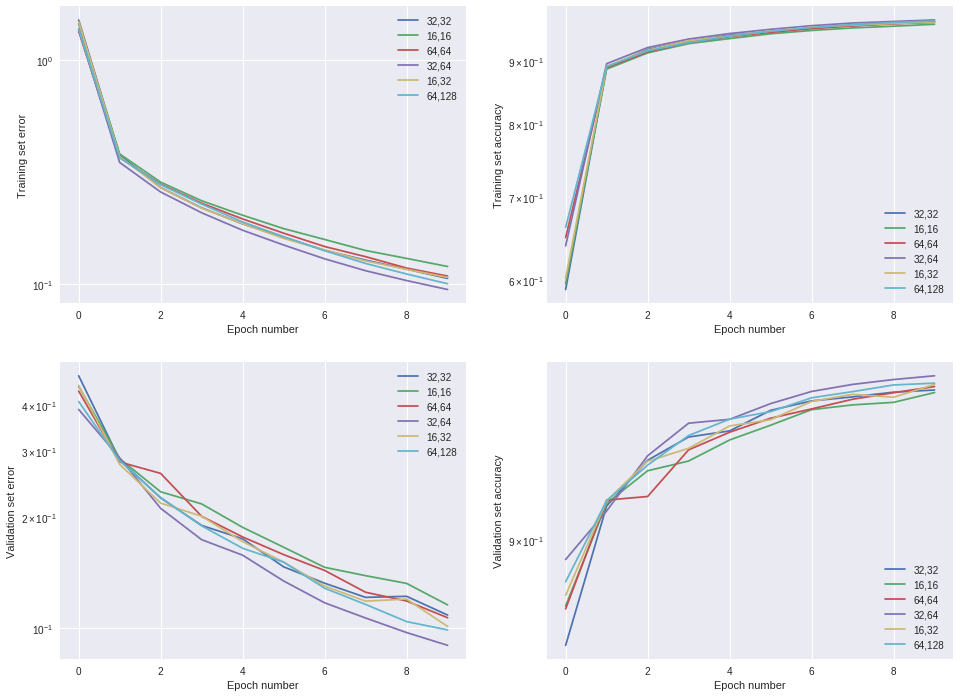

In [24]:
plot_res(conv_total,'conv.pdf')

Best performance achieved by using a conv layer of size 32, and the 2nd conv layer of size 64.

val_loss: 0.0901, val_acc: 0.9734

In [28]:
params={'conv': 32, 'fc_size': fc_size[0], 'kernel_size': 3, 'lr': 0.001, 'pool': pool[0]}
# tuning dense layer size
fc_logs={}
for fc in fc_size[1:]:
  params['fc_size']=fc
  print(params)
  m=build_model(params)
  h=train(m,epochs=10)
  fc_logs[fc]=h.history
  
write_logs(fc_logs,'fc_logs.json')


{'conv': 32, 'fc_size': 256, 'kernel_size': 3, 'lr': 0.001, 'pool': 2}
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 70s 1ms/step - loss: 1.2713 - acc: 0.6689 - val_loss: 0.4130 - val_acc: 0.8694
Epoch 2/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0.3522 - acc: 0.8930 - val_loss: 0.2609 - val_acc: 0.9252
Epoch 3/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0.2622 - acc: 0.9198 - val_loss: 0.2196 - val_acc: 0.9366
Epoch 4/10
48000/48000 [==============================] - 70s 1ms/step - loss: 0.2113 - acc: 0.9359 - val_loss: 0.1872 - val_acc: 0.9458
Epoch 5/10
48000/48000 [==============================] - 70s 1ms/step - loss: 0.1752 - acc: 0.9479 - val_loss: 0.1534 - val_acc: 0.9557
Epoch 6/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0.1501 - acc: 0.9553 - val_loss: 0.1401 - val_acc: 0.9602
Epoch 7/10
48000/48000 [==============================] -

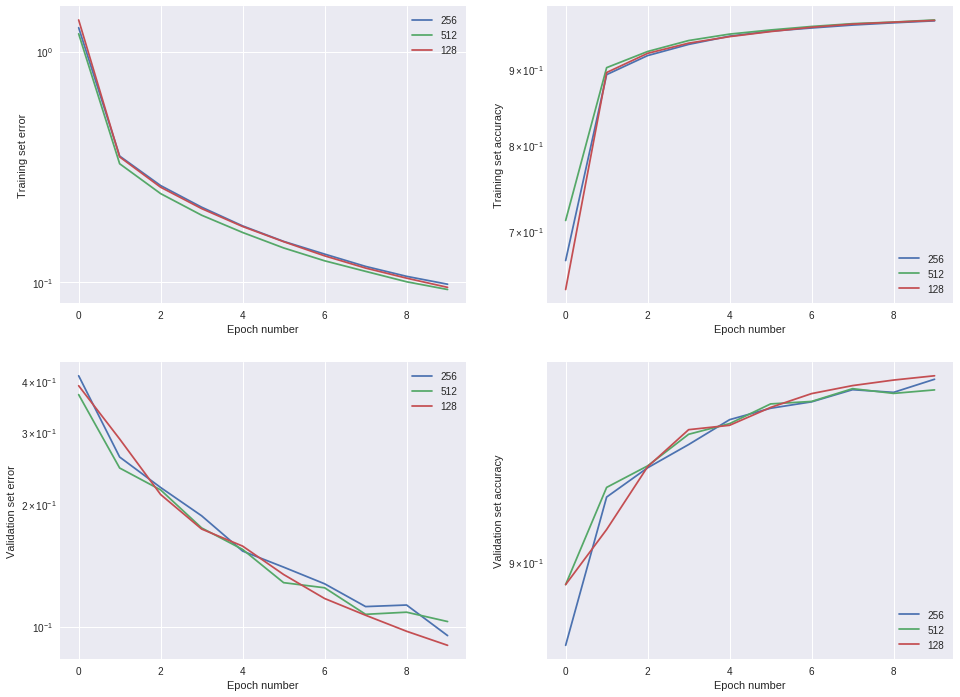

In [38]:
plot_res(fc_logs,'fc_logs.pdf')

Best performance achieved by using a dense layer of size 128.

val_loss: 0.0901, val_acc: 0.9734 

In [39]:
params={'conv': 32, 'fc_size': 128, 'kernel_size': 3, 'lr': 0.001, 'pool': pool[0]}
# tuning size of pooling window
pool_logs={}
for p in pool[1:]:
  params['pool']=p
  print(params)
  m=build_model(params)
  h=train(m,epochs=10)
  pool_logs[p]=h.history
  
write_logs(pool_logs,'pool_logs.json')


{'conv': 32, 'fc_size': 128, 'kernel_size': 3, 'lr': 0.001, 'pool': 3}
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 42s 876us/step - loss: 1.8469 - acc: 0.4822 - val_loss: 0.9309 - val_acc: 0.7676
Epoch 2/10
48000/48000 [==============================] - 41s 860us/step - loss: 0.6154 - acc: 0.8252 - val_loss: 0.3864 - val_acc: 0.8913
Epoch 3/10
48000/48000 [==============================] - 41s 859us/step - loss: 0.3560 - acc: 0.8931 - val_loss: 0.2851 - val_acc: 0.9103
Epoch 4/10
48000/48000 [==============================] - 41s 861us/step - loss: 0.2683 - acc: 0.9180 - val_loss: 0.2406 - val_acc: 0.9268
Epoch 5/10
48000/48000 [==============================] - 42s 871us/step - loss: 0.2185 - acc: 0.9326 - val_loss: 0.1829 - val_acc: 0.9463
Epoch 6/10
48000/48000 [==============================] - 41s 862us/step - loss: 0.1902 - acc: 0.9412 - val_loss: 0.1635 - val_acc: 0.9506
Epoch 7/10
48000/48000 [=====================

Pooling size of 2X2 performed better. Performance metrics are same as the ones last reported.

The results so far tell us about how each individual hyperparamter effects the loss and prediction of the model. Next, we will examine the interaction effects of some of the hyperparameter combinations, in particular, kernel size of CONV layer and the pooling window.

In [20]:
params={'conv': 32, 'fc_size': 128, 'kernel_size': 3, 'lr': 0.001, 'pool': 3}
# interaction between kernel and pool size
# kernel_logs={}
for k in kernel_size[1:]:
  params['kernel_size']=k
  print(params)
  m=build_model(params)
  h=train(m,epochs=10)
  key='p=3,k='+str(k)
  pool_logs[key]=h.history
  
write_logs(pool_logs,'pool_logs.json')

{'conv': 32, 'fc_size': 128, 'kernel_size': 4, 'lr': 0.001, 'pool': 3}
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 63s 1ms/step - loss: 1.6574 - acc: 0.5568 - val_loss: 0.6143 - val_acc: 0.8599
Epoch 2/10
48000/48000 [==============================] - 62s 1ms/step - loss: 0.4113 - acc: 0.8860 - val_loss: 0.2504 - val_acc: 0.9309
Epoch 3/10
48000/48000 [==============================] - 62s 1ms/step - loss: 0.2459 - acc: 0.9288 - val_loss: 0.1841 - val_acc: 0.9463
Epoch 4/10
48000/48000 [==============================] - 62s 1ms/step - loss: 0.1895 - acc: 0.9441 - val_loss: 0.1651 - val_acc: 0.9506
Epoch 5/10
48000/48000 [==============================] - 61s 1ms/step - loss: 0.1590 - acc: 0.9527 - val_loss: 0.1522 - val_acc: 0.9523
Epoch 6/10
48000/48000 [==============================] - 62s 1ms/step - loss: 0.1383 - acc: 0.9583 - val_loss: 0.1282 - val_acc: 0.9615
Epoch 7/10
48000/48000 [==============================] -

In [0]:
write_logs(pk_logs,'poolXkernel_logs.json')

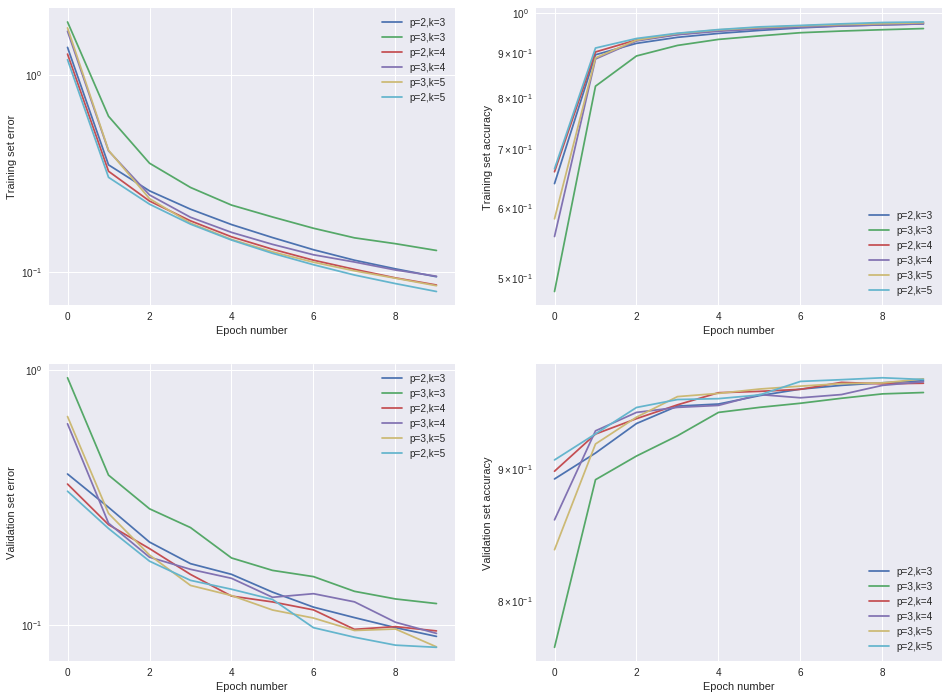

In [28]:
plot_res(pk_logs,'pool_logs.pdf')

Using same size of CONV kernel and pooling window results in the worst performance. So pooling size has to be smaller than the size of the CONV layer kernel. 

Best performance achieved by using CONV kernel k=5 and pooling P=2. However we choose k=3 and p=2 for computational efficiency. 



---


**Regularisation**

In [12]:
params={'conv': 32, 'fc_size': 128, 'kernel_size': 3, 'lr': 0.001, 'pool': 2, 'drop1':drop1[0], 'drop2':drop2[0]}
# adding dropout-- dropout rate for the 2 layers are treated separately which allows us to examine how these interact.
drop_logs={}
for d1 in drop1:
  params['drop1']=d1

  for d2 in drop2:
    params['drop2']=d2
    print(params)
    m=build_model(params)
    h=train(m,epochs=10)
    key='d1={},d2={}'.format(d1,d2)
    drop_logs[key]=h.history
  
write_logs(drop_logs,'drop_logs.json')


{'conv': 32, 'fc_size': 128, 'kernel_size': 3, 'lr': 0.001, 'pool': 2, 'drop1': 0, 'drop2': 0}
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 71s 1ms/step - loss: 1.4881 - acc: 0.6347 - val_loss: 0.4525 - val_acc: 0.8793
Epoch 2/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0.3666 - acc: 0.8938 - val_loss: 0.2910 - val_acc: 0.9125
Epoch 3/10
48000/48000 [==============================] - 68s 1ms/step - loss: 0.2639 - acc: 0.9216 - val_loss: 0.2148 - val_acc: 0.9401
Epoch 4/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0.2114 - acc: 0.9376 - val_loss: 0.2055 - val_acc: 0.9393
Epoch 5/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0.1771 - acc: 0.9469 - val_loss: 0.1607 - val_acc: 0.9526
Epoch 6/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0.1526 - acc: 0.9545 - val_loss: 0.1393 - val_acc: 0.9608
Epoch 7/10
48000/48000 [=========

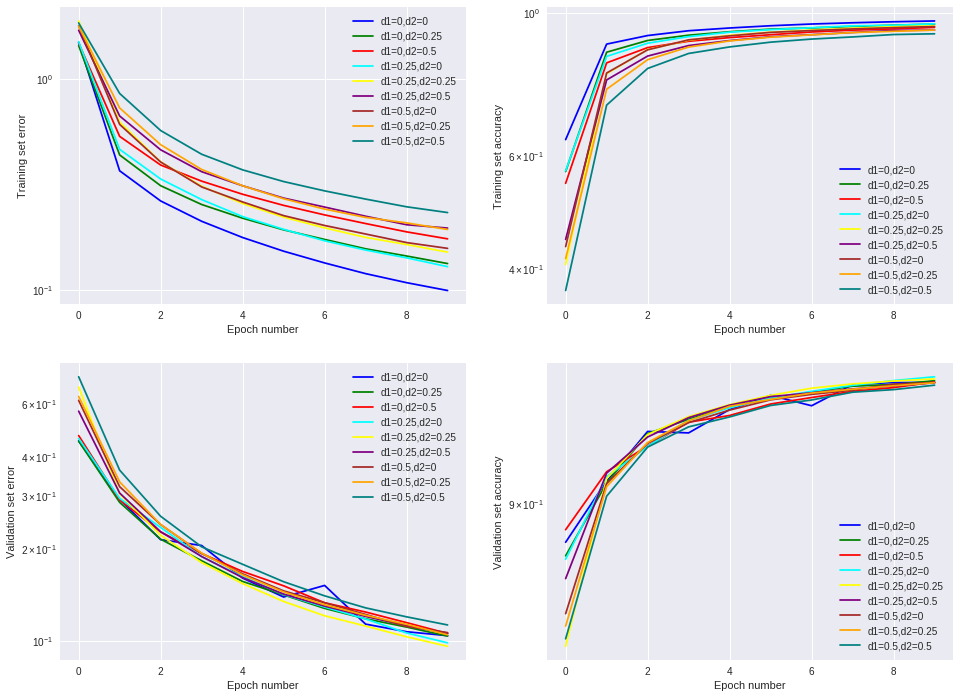

In [39]:
plot_res(drop_logs,'dropout.pdf')

Adding dropout results in smoother error function and accuracy plot (i.e. the values are not suddenly jumping). Best performance achieved by using a drop rate of 0.25 for both dropout layers.

val_loss: 0.0960, val_acc: 0.9703

In [62]:
# adding batch normalisation (in the build_model function)
params={'conv': 32, 'fc_size': 128, 'kernel_size': 3, 'lr': 0.001, 'pool': 2, 'drop1':0.25, 'drop2':0.25}
m=build_model(params)
h=train(m,epochs=10)
write_logs(h.history,'BN_logs.json')

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 189s 4ms/step - loss: 0.1485 - acc: 0.9541 - val_loss: 0.0656 - val_acc: 0.9808
Epoch 2/10
48000/48000 [==============================] - 187s 4ms/step - loss: 0.0552 - acc: 0.9832 - val_loss: 0.0565 - val_acc: 0.9842
Epoch 3/10
48000/48000 [==============================] - 188s 4ms/step - loss: 0.0401 - acc: 0.9871 - val_loss: 0.0381 - val_acc: 0.9887
Epoch 4/10
48000/48000 [==============================] - 189s 4ms/step - loss: 0.0312 - acc: 0.9901 - val_loss: 0.0334 - val_acc: 0.9892
Epoch 5/10
48000/48000 [==============================] - 192s 4ms/step - loss: 0.0254 - acc: 0.9920 - val_loss: 0.0376 - val_acc: 0.9878
Epoch 6/10
48000/48000 [==============================] - 193s 4ms/step - loss: 0.0226 - acc: 0.9925 - val_loss: 0.0344 - val_acc: 0.9907
Epoch 7/10
48000/48000 [==============================] - 193s 4ms/step - loss: 0.0190 - acc: 0.9937 - val_loss: 0.0418 - 

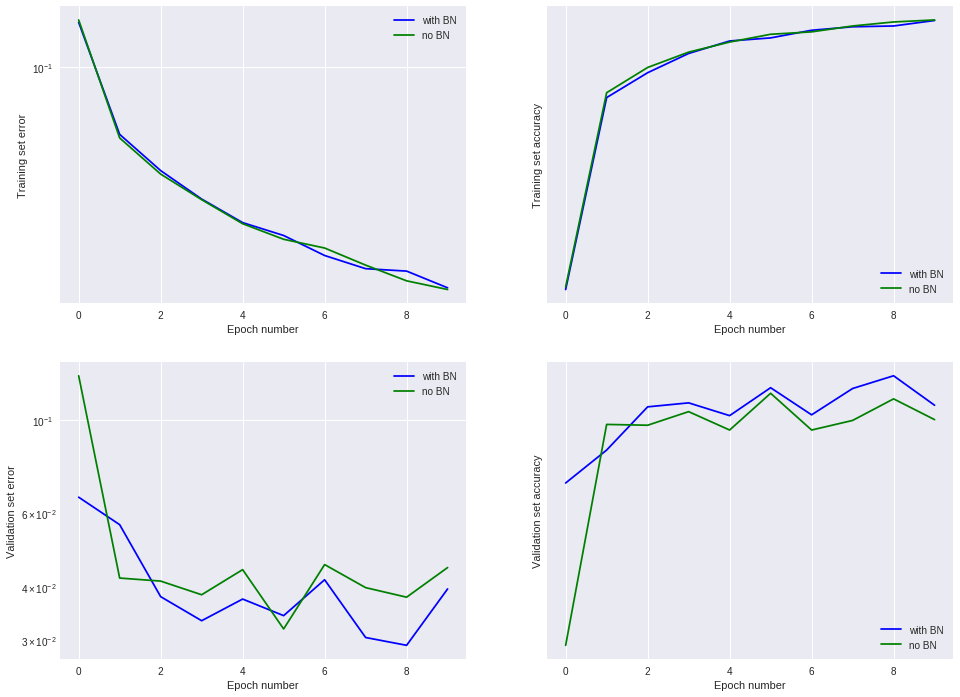

In [71]:
plot_res(bn_compare,'bn.pdf')

Batch normalisation improved the performance by a significant amount.

val_loss: 0.0398, val_acc: 0.9889


### 2.1.4: Evaluation

Evaluate your model.

When possible, you should have:
  * Loss curves: Plot epoch (# passes over training data) and loss
  * Accuracy curves: Plot epoch and accuracy over val/test set
  * Final numbers: Report final accuracy numbers for your model

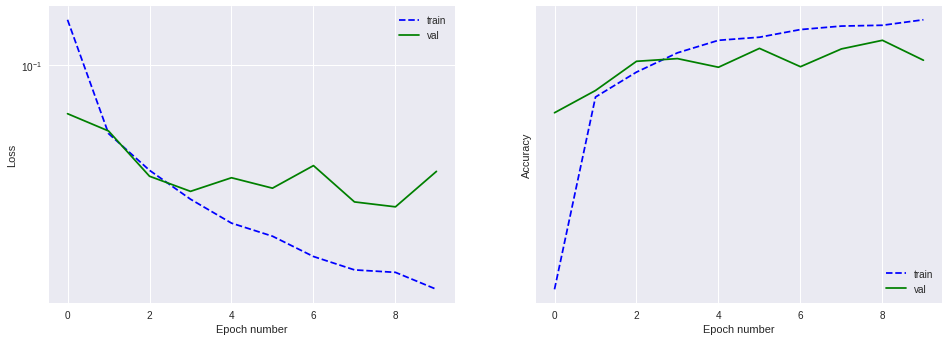

In [68]:
# Final model
plot_res_compact({'final':h.history},'final.pdf')

In [67]:
def evaluate(model):
  loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

  print(f'Test loss: {loss:.3}')
  print(f'Test accuracy: {accuracy:.3}')
  
evaluate(m)

Test loss: 0.0333
Test accuracy: 0.99


### 2.1.5: Summary

Summarize your findings:
 * Which hyper-parameters were important and how did they influence your results?
 
1. Learning rate: lower values improves prediction accuracy
2. Dropout: tradeoff between reguarlisation and performance: higher values of dropout rate prevent the training error from getting too low, however, the validation set accuracy also suffers. 
3. BN increases the training speed of the network. The error function converged faster and the achieved a higher accuracy on the validation set.


* What were other design choices you faced?

  Although a kernel size of 5 gave higher validation accuracy, we used picked the optimal value as 3 because of lesser run time per epoch (the number of parameters the model needs to learn is decreased.) The increase in accuracy with the bigger kernel was not enough to justify the 4X longer run time.
 
* Any other interesting insights...

 The dataset is not complex enough properly evaluate the effects of different hyperparameter values because changes to hyperparameter values result in very small changes in the performance (the plots use logarithmic axes, and have to be really zoomed to notice the difference). CNNs are very powerful models, generally used on real-world images with complex objects.

# 3. Summary

Enter your final summary here.

You should now compare performance  on the three models [M1], [M2] and [M3]. Present this in a tabular format and/or using plots.


Test error:


*   SVM:  R squared: 0.9604,  MSE: 0.7768
*   MLP: 0.248
* CNN: 0.033



Test accuracy: 


*   SVM: 0.943
*   MLP: 0.922
* CNN: 0.99


Which model do you recommend to perform digit classification and why?

The recommended model for digit classification is a Convolutional Neural Network because it gave the lowest error function and highest accuracy on the task.

Feel free to discuss other insightful observations.